# Load the CSV file into a Pandas DataFrame

In [3]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import numpy as np
essay_ids = range(1,7)
threshold=1
data_path = "asap-aes/"
org = pd.read_excel(data_path+"training_set_rel3.xlsx")
domains = ['domain1', 'domain2']

In [4]:
def read_set(essay_id):
    df = pd.read_csv(data_path+"results_gemini/EssaySet"+str(essay_id)+"_assessment_results_by_rubric.csv")
    if essay_id==1:
        df['domain1_score']= df['domain1_score']//2
        df['domain1_score'].head(5)
    return df

# Data visualization CM

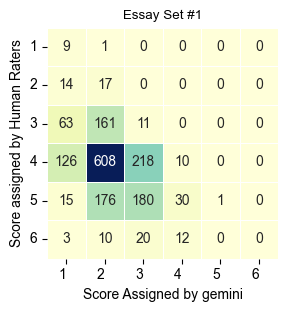

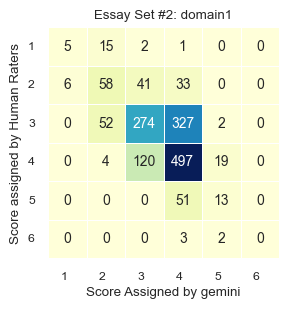

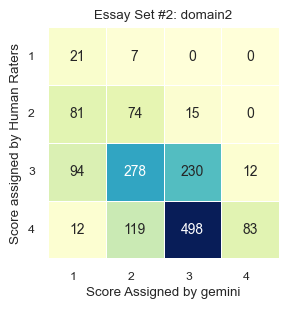

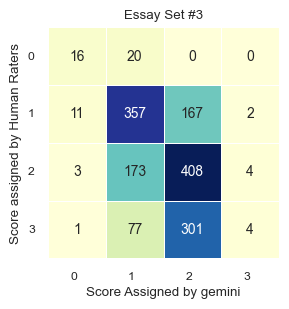

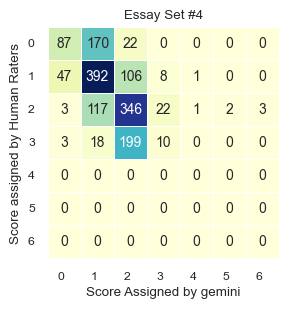

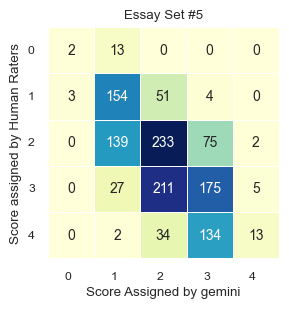

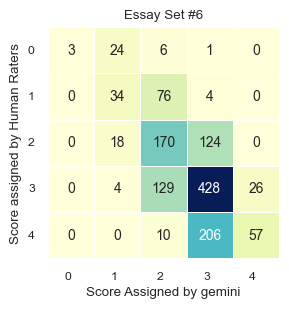

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
for essay_id in essay_ids:
    df = read_set(essay_id)
  # Fill missing score_gemini with data from points_gp (assuming columns match)
    

    for domain in domains:
        # domain = "Language Convensions"
        # Extract the actual and predicted scores as NumPy arrays
        if domain+'_Score_gemini' in df.columns:
            if domain+'_Point_gemini' in df.columns:
                df[domain+'_Score_gemini'] = df[domain+'_Score_gemini'].fillna(df[domain+'_Point_gemini'])
            df.dropna(subset=[domain+'_Score_gemini'], inplace=True)
            df.dropna(subset=[domain+'_score'], inplace=True)
            # Assuming you have the actual and predicted scores in two lists or arrays
            # Assuming you have the actual and predicted scores in two lists or arrays
            actual_scores = df[domain+'_score'].astype(int).tolist()
            predicted_scores = df[domain+'_Score_gemini'].astype(int).tolist()
            # Modify predicted scores to have a single class for scores greater than 6
            m_predicted_scores = [score//4 if score > 6 else score for score in predicted_scores]

            # Define the unique labels in the score range
            score_labels = sorted(set(actual_scores + m_predicted_scores))

            # Create the confusion matrix
            cm = confusion_matrix(actual_scores, m_predicted_scores, labels=score_labels)

            # Create a DataFrame for the confusion matrix
            cm_df = pd.DataFrame(cm, index=score_labels, columns=score_labels)

            # Set up the figure and axis
            fig, ax = plt.subplots(figsize=(4, 3))
            sns.set(font_scale=0.8)

            # Create a heatmap with white background
            sns.heatmap(cm_df, annot=True, cmap='YlGnBu', fmt='d', annot_kws={"size": 10}, cbar=False, linewidths=0.5, square=True, ax=ax)

            # Set labels and title
            ax.set_xlabel('Score Assigned by gemini')
            ax.set_ylabel('Score assigned by Human Raters')
            if (essay_id!=2):
                ax.set_title("Essay Set #"+str(essay_id))
            else:
                ax.set_title("Essay Set #"+str(essay_id)+": "+domain)
                
            graph_path = data_path+"reports_graphs_gemini/EssaySet"+str(essay_id)+"_"+domain+"_"

            # Rotate the tick labels for better readability if needed
            plt.xticks(rotation=0, ha='right')
            plt.yticks(rotation=0)
            plt.savefig(graph_path+"cm.png", bbox_inches='tight')

            # Show the plot
            plt.show()


# point 1 Confusion matrix variation 

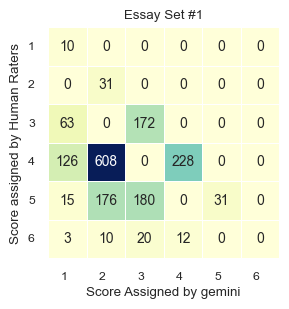

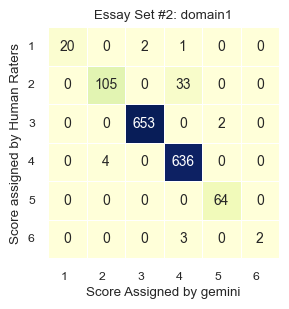

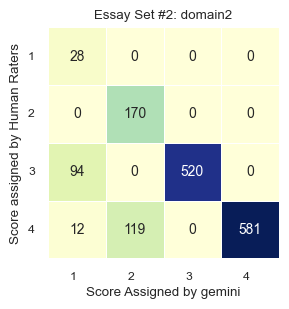

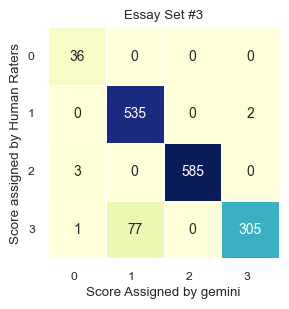

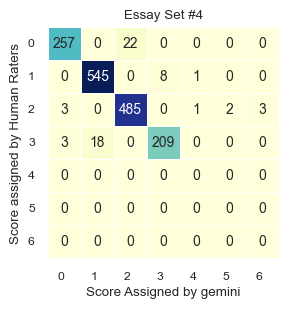

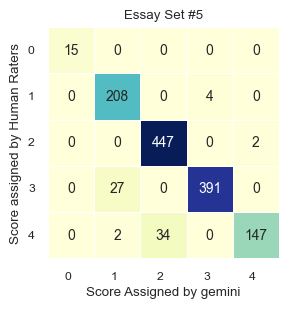

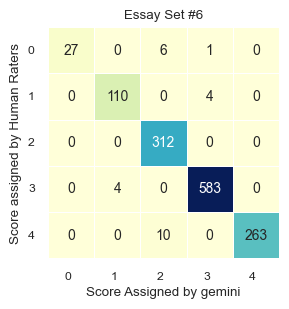

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for essay_id in essay_ids:
    df = read_set(essay_id)
    for domain in domains:
        # domain = "Language Convensions"
        # Extract the actual and predicted scores as NumPy arrays
        if domain+'_Score_gemini' in df.columns:
            if domain+'_Point_gemini' in df.columns:
                df[domain+'_Score_gemini'] = df[domain+'_Score_gemini'].fillna(df[domain+'_Point_gemini'])
            df.dropna(subset=[domain+'_Score_gemini'], inplace=True)
            df.dropna(subset=[domain+'_score'], inplace=True)
            # Assuming you have the actual and predicted scores in two lists or arrays
            actual_scores = df[domain+'_score'].astype(int).tolist()
            predicted_scores = df[domain+'_Score_gemini'].astype(int).tolist()
            predicted_scores = [score//4 if score > 6 else score for score in predicted_scores]
            # Define the acceptable range for score variation
            acceptable_range = 1

            # Group the scores within the acceptable range
            actual_scores_grouped = actual_scores
            predicted_scores_grouped = [score if abs(score - pred_score) <= acceptable_range else pred_score
                                        for score, pred_score in zip(actual_scores, predicted_scores)]

            # Define the unique labels in the grouped score range
            score_labels_grouped = sorted(set(actual_scores_grouped + predicted_scores_grouped))

            # Create the confusion matrix
            cm = confusion_matrix(actual_scores_grouped, predicted_scores_grouped, labels=score_labels_grouped)

            # Create a DataFrame for the confusion matrix
            cm_df = pd.DataFrame(cm, index=score_labels_grouped, columns=score_labels_grouped)

            # Set up the figure and axis
            fig, ax = plt.subplots(figsize=(4, 3))
            sns.set(font_scale=0.8)

            # Create a heatmap with white background
            sns.heatmap(cm_df, annot=True, cmap='YlGnBu', fmt='d', annot_kws={"size": 10}, cbar=False, linewidths=0.5, square=True, ax=ax)

            # Set labels and title
            ax.set_xlabel('Score Assigned by gemini')
            ax.set_ylabel('Score assigned by Human Raters')
            if (essay_id!=2):
                ax.set_title("Essay Set #"+str(essay_id))
            else:
                ax.set_title("Essay Set #"+str(essay_id)+": "+domain)
                
            graph_path = data_path+"reports_graphs_gemini/EssaySet"+str(essay_id)+"_"+domain+"_"

            # Rotate the tick labels for better readability if needed
            plt.xticks(rotation=0, ha='right')
            plt.yticks(rotation=0)
            plt.savefig(graph_path+"cm_point1.png", bbox_inches='tight')
            # Show the plot
            plt.show()

# Cohen Kappa Score

In [8]:
from sklearn.metrics import cohen_kappa_score

for essay_id in essay_ids:
    df = read_set(essay_id)
    for domain in domains:
        # domain = "Language Convensions"
        # Extract the actual and predicted scores as NumPy arrays
        if domain+'_Score_gemini' in df.columns:
            if domain+'_Point_gemini' in df.columns:
                df[domain+'_Score_gemini'] = df[domain+'_Score_gemini'].fillna(df[domain+'_Point_gemini'])
            df.dropna(subset=[domain+'_Score_gemini'], inplace=True)
            df.dropna(subset=[domain+'_score'], inplace=True)
            # Assuming you have the actual and predicted scores in two lists or arrays
            # Assuming you have the actual and predicted scores in two lists or arrays
            actual_scores = df[domain+'_score'].astype(int).tolist()
            predicted_scores = df[domain+'_Score_gemini'].astype(int).tolist()
            # Modify predicted scores to have a single class for scores greater than 6
            m_predicted_scores = [score//4 if score > 6 else score for score in predicted_scores]

            # Calculate Cohen's Kappa
            kappa = cohen_kappa_score(actual_scores, m_predicted_scores)

            print("Cohen's Kappa Score for Essay ID: ", essay_id, "Domain: ", domain, ": ",  kappa,  "\n\n")


Cohen's Kappa Score for Essay ID:  1 Domain:  domain1 :  -0.03872083858497066 


Cohen's Kappa Score for Essay ID:  2 Domain:  domain1 :  0.27965354815651355 


Cohen's Kappa Score for Essay ID:  2 Domain:  domain2 :  0.006348260450442456 


Cohen's Kappa Score for Essay ID:  3 Domain:  domain1 :  0.2326521097719163 


Cohen's Kappa Score for Essay ID:  4 Domain:  domain1 :  0.3217319530900712 


Cohen's Kappa Score for Essay ID:  5 Domain:  domain1 :  0.2269100010464693 


Cohen's Kappa Score for Essay ID:  6 Domain:  domain1 :  0.27325392803727 


